# Filtering census tract shapefiles by county

The event siting tool uses census tract-level shapefiles as most data is at the census tract level. As the tool is meant to be run at the county level, we want separate shapefiles for all census tracts in each county.

This notebook demonstrates how we retrieve census tract shapefiles for Florida and filter them down to obtain county-specific census tract shapefiles.

### Data Sources

- TIGER/Line Shapefiles for Florida are downloaded from [data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2017-state-florida-current-census-tract-state-based) and placed in `data/external`.

The output file is saved to `data/interim/cleaned_shapefiles/<county-name>_county_census_tracts.geojson`.

In [1]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

DATA_DIR = os.path.join("..", "..", "data")

/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Census tract shapefiles

In [5]:
TRACT_PATH = os.path.join(DATA_DIR, "external", "tl_2017_12_tract")

# Load all florida census tracts
fl_tracts = gpd.read_file(TRACT_PATH).to_crs(4326)
fl_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,020411,12011020411,204.11,Census Tract 204.11,G5020,S,4390110,30942,+26.2192961,-080.2668292,"POLYGON ((-80.27397 26.21879, -80.27394 26.219..."
1,12,011,010102,12011010102,101.02,Census Tract 101.02,G5020,S,1631520,42476,+26.2978678,-080.0882174,"POLYGON ((-80.09511 26.29210, -80.09489 26.293..."
2,12,011,110402,12011110402,1104.02,Census Tract 1104.02,G5020,S,1842613,1526,+25.9767983,-080.2401050,"POLYGON ((-80.24709 25.98157, -80.24699 25.981..."
3,12,011,010304,12011010304,103.04,Census Tract 103.04,G5020,S,1152960,0,+26.3010567,-080.1134552,"POLYGON ((-80.12139 26.29793, -80.12105 26.299..."
4,12,011,010401,12011010401,104.01,Census Tract 104.01,G5020,S,1830875,39595,+26.3225329,-080.1621976,"POLYGON ((-80.17015 26.32778, -80.17010 26.327..."


<AxesSubplot:>

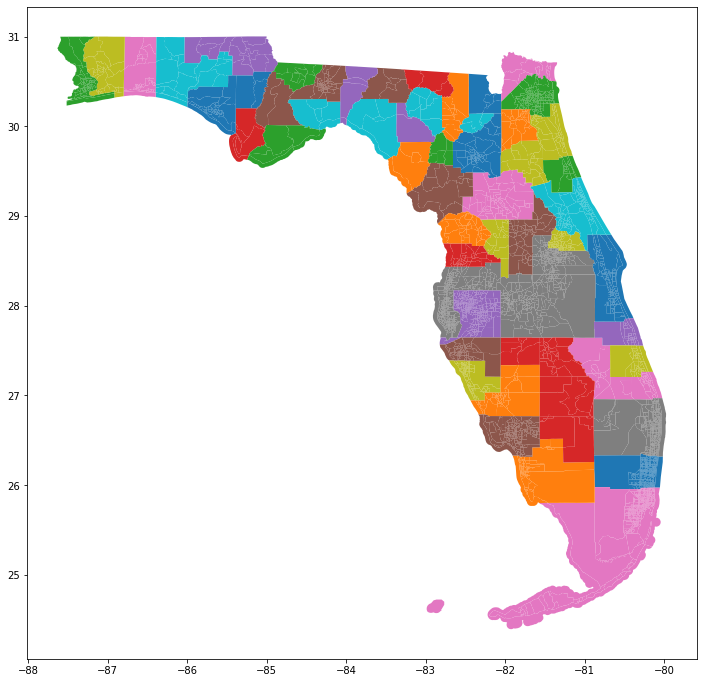

In [14]:
fl_tracts.plot(figsize=(12,12), column="COUNTYFP")

In [10]:
# Filter down using FIPS code
# Source: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/fl/about/?cid=nrcs143_013697
COUNTY_FIPS = {
    "lake": "069",
    "orange": "095",
    "osceola": "097",
    "seminole": "117"
}

In [11]:
for county, fips in COUNTY_FIPS.items():
    
    # Filter
    county_tracts = fl_tracts[fl_tracts['COUNTYFP'] == fips]
    
    # Save
    file_name = f"{county}_county_census_tracts.geojson"
    output_path = os.path.join(DATA_DIR, "interim", "cleaned_shapefiles", file_name)
    county_tracts.to_file(output_path, driver="GeoJSON")

/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the 